In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cv2
import tools

In [19]:
skeleton=np.load("../testskel.npy")
for coord in skeleton:
    coord[0] = coord[0] * 128/640
    coord[1] = coord[1] * 128/480
image = np.load("../testimg.npy")

In [20]:
def joint_angle_from_joint_positions(joint1, joint2, joint3):
    dir12 = joint2 - joint1
    dir23 = joint3 - joint2
    
    angle_joint_2 = np.arccos(np.dot(dir12, dir23) / np.linalg.norm(dir12) * np.linalg.norm(dir23))
    return angle_joint_2

In [21]:
def __draw2djoints_matplotlib(ax, annots, links, alpha=1):
    """
    Draw segments, one color per link
    https://github.com/guiggh/hand_pose_action/blob/master/load_example.py#L66
    """
    colors = ['r', 'm', 'b', 'c', 'g']

    for finger_idx, finger_links in enumerate(links):
        for idx in range(len(finger_links) - 1):
            __draw2dseg_matplotlib(
                    ax,
                    annots,
                    finger_links[idx],
                    finger_links[idx + 1],
                    c=colors[finger_idx],
                    alpha=alpha)

In [22]:
def __draw2dseg_matplotlib(ax, annot, idx1, idx2, c='r', alpha=1):
    """Draw segment of given color
    https://github.com/guiggh/hand_pose_action/blob/master/load_example.py#L81
    """
    ax.plot(
            [annot[idx1, 0], annot[idx2, 0]], [annot[idx1, 1], annot[idx2, 1]],
            c=c,
            alpha=alpha)

In [29]:
def visualize_joints_2d(canvas, joints, joint_idxs=True, joint_names=None, links=None, alpha=1):
    """Draw 2d skeleton on matplotlib axis
    Based on https://github.com/guiggh/hand_pose_action/blob/master/load_example.py#L49
    """
    if links is None:
        links = [(0, 1, 6, 7, 8), (0, 2, 9, 10, 11), (0, 3, 12, 13, 14),
                 (0, 4, 15, 16, 17), (0, 5, 18, 19, 20)]

    if isinstance(canvas, matplotlib.axes.SubplotBase):
        ax = canvas
        # Scatter hand joints on image
        x = joints[:, 0]
        y = joints[:, 1]
        ax.scatter(x, y, 1, 'r')

        # Add idx labels to joints
        for row_idx, row in enumerate(joints):
            if joint_idxs:
                if joint_names:
                    plt.annotate(str(joint_names[row_idx]), (row[0], row[1]))
                else:
                    plt.annotate(str(row_idx), (row[0], row[1]))

        __draw2djoints_matplotlib(ax, joints, links, alpha=alpha)
        
    elif isinstance(canvas, np.ndarray):
        img = canvas
        
        for joint in joints:
            joint = joint.astype(np.int)
            img = cv2.circle(img, tuple(joint), 1, (255, 0, 0), 1)
        img = __draw2djoints_cv(img, joints, links, alpha=alpha)


True


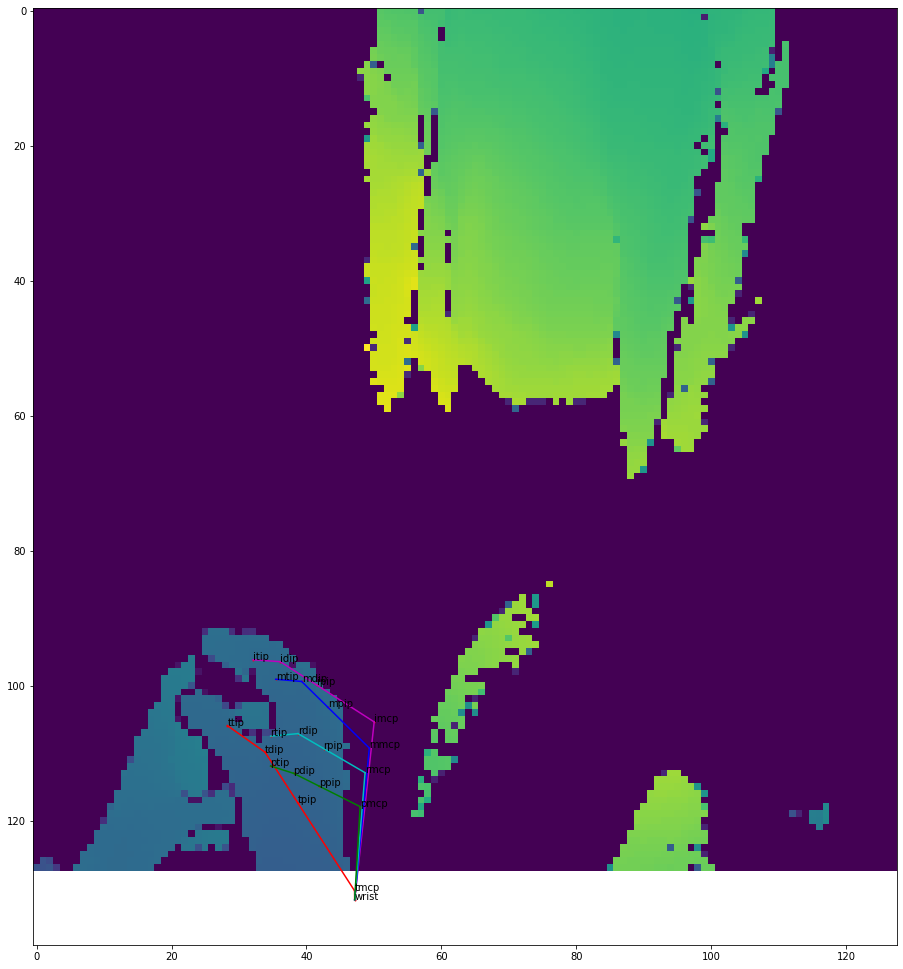

In [24]:
    
fig = plt.figure(figsize=(140, 100))
ax = fig.add_subplot(5, 5, 1)
ax.imshow(image)
print(isinstance(ax, matplotlib.axes.SubplotBase))
visualize_joints_2d(ax, skeleton, joint_names=tools.FHAD.get_joint_names())    

In [35]:
def __draw2dseg_cv(img, joints, idx1, idx2, c='r', alpha=1):
    cmap = {
            'r': (255, 0, 0),
            'm': (255,0,255),
            'b': (0,0,240),
            'c': (0,255,255),
            'g': (0, 240, 0)
    }
    img = cv2.line(img, tuple(joints[idx1].astype(np.int)), tuple(joints[idx2].astype(np.int)), cmap[c])
    return img

In [26]:
def __draw2djoints_cv(img, joints, links, alpha=1):
    """
    Draw segments, one color per link
    https://github.com/guiggh/hand_pose_action/blob/master/load_example.py#L66
    """
    colors = ['r', 'm', 'b', 'c', 'g']

    for finger_idx, finger_links in enumerate(links):
        for idx in range(len(finger_links) - 1):
            img = __draw2dseg_cv(
                    img,
                    joints,
                    finger_links[idx],
                    finger_links[idx + 1],
                    c=colors[finger_idx],
                    alpha=alpha)
    return img

In [27]:
print(type(skeleton))
if isinstance(skeleton, np.ndarray):
    print("whoa")
    

<class 'numpy.ndarray'>
whoa


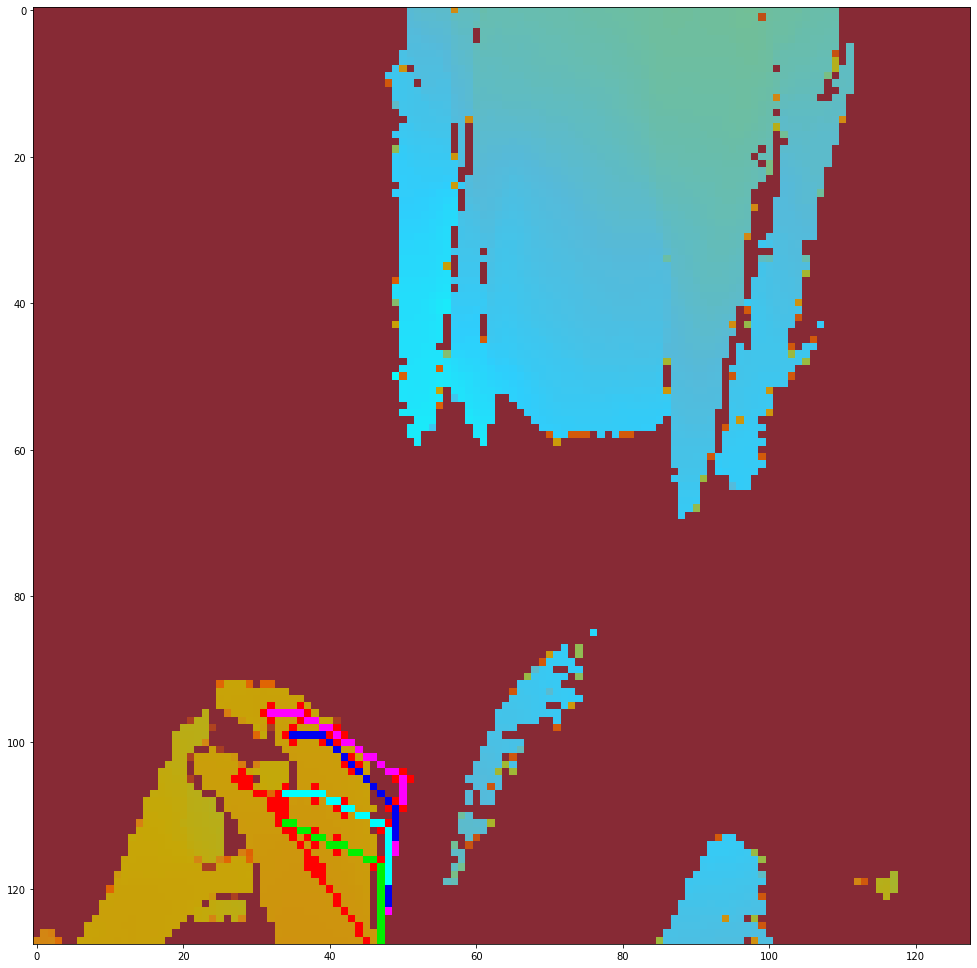

In [36]:
window_name = "bullshit"
window = cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(image)
image2 = cv2.convertScaleAbs(image, alpha=255/maxVal)
image2 = cv2.applyColorMap(image2, cv2.COLORMAP_PARULA)
visualize_joints_2d(image2, skeleton, joint_names=tools.FHAD.get_joint_names() )
fig = plt.figure(figsize=(140, 100))
ax = fig.add_subplot(5, 5, 1)
ax.imshow(image2)




In [3]:
import os
checkpoint_dir = r"E:\Google Drive\UNI\Master\Thesis\src\data\pose_est\checkpoints"
__checkpoint_file_prefix = "pose_est_"
if os.path.exists(checkpoint_dir):
    cp_files = [os.path.abspath(os.path.join(checkpoint_dir, filename)) for filename in os.listdir(checkpoint_dir)]
    cp_files = [path for path in cp_files if os.path.isfile(path) and __checkpoint_file_prefix in os.path.basename(path)]

    if len(cp_files) > 0:
        files_sorted = sorted(cp_files, key=os.path.getctime, reverse=True)
        for file in files_sorted:
            print(file)
            print(os.path.getctime(file))

E:\Google Drive\UNI\Master\Thesis\src\data\pose_est\checkpoints\pose_est_weights.08.hdf5
1573663882.467198
E:\Google Drive\UNI\Master\Thesis\src\data\pose_est\checkpoints\pose_est_weights.07.hdf5
1573663861.458806
E:\Google Drive\UNI\Master\Thesis\src\data\pose_est\checkpoints\pose_est_weights.06.hdf5
1573663769.454577
E:\Google Drive\UNI\Master\Thesis\src\data\pose_est\checkpoints\pose_est_weights.05.hdf5
1573663676.3835974
E:\Google Drive\UNI\Master\Thesis\src\data\pose_est\checkpoints\pose_est_weights.04.hdf5
1573663582.8991027
E:\Google Drive\UNI\Master\Thesis\src\data\pose_est\checkpoints\pose_est_weights.03.hdf5
1573663490.246633
E:\Google Drive\UNI\Master\Thesis\src\data\pose_est\checkpoints\pose_est_weights.02.hdf5
1573663397.1137266
E:\Google Drive\UNI\Master\Thesis\src\data\pose_est\checkpoints\pose_est_weights.01.hdf5
1573663304.3908293


In [9]:
from datetime import datetime
import shutil
import tools
__logger = tools.get_logger(__name__, do_file_logging=False)

tensorboard_dir = r"E:\Google Drive\UNI\Master\Thesis\src\data\pose_est\tensorboard_logs"
run_types = ["train", "validation", "test"]
for run_type in run_types:
    type_dir = os.path.join(tensorboard_dir, run_type)
    if os.path.exists(type_dir):
        log_files = sorted([os.path.join(type_dir, file) for file in os.listdir(type_dir) if os.path.isfile(os.path.join(type_dir, file))], key=os.path.getmtime)
        if len(log_files) > 0:
            time = datetime.fromtimestamp(os.path.getmtime(log_files[0])).strftime('%Y-%m-%d_%H-%M-%S')
            backupdir = os.path.join(type_dir, "old_runs", time)
            os.makedirs(backupdir)
            for file in log_files:
                shutil.move(file, backupdir)
                print("Moving log file {} to {}".format(file, backupdir))

Moving log file E:\Google Drive\UNI\Master\Thesis\src\data\pose_est\tensorboard_logs\train\events.out.tfevents.1573663206.SIMON-PC.19816.9827.v2 to E:\Google Drive\UNI\Master\Thesis\src\data\pose_est\tensorboard_logs\train\old_runs\2019-11-13_17-51-22
Moving log file E:\Google Drive\UNI\Master\Thesis\src\data\pose_est\tensorboard_logs\train\events.out.tfevents.1573663911.SIMON-PC.19900.9827.v2 to E:\Google Drive\UNI\Master\Thesis\src\data\pose_est\tensorboard_logs\train\old_runs\2019-11-13_17-51-22
Moving log file E:\Google Drive\UNI\Master\Thesis\src\data\pose_est\tensorboard_logs\train\events.out.tfevents.1573664674.SIMON-PC.352.10093.v2 to E:\Google Drive\UNI\Master\Thesis\src\data\pose_est\tensorboard_logs\train\old_runs\2019-11-13_17-51-22
Moving log file E:\Google Drive\UNI\Master\Thesis\src\data\pose_est\tensorboard_logs\train\events.out.tfevents.1573665365.SIMON-PC.19948.10093.v2 to E:\Google Drive\UNI\Master\Thesis\src\data\pose_est\tensorboard_logs\train\old_runs\2019-11-13_1